In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from io import BytesIO
import os

In [4]:
zipfile_path = "names.zip"

In [55]:
extracted_dir = 'extracted data'
os.makedirs(extracted_dir, exist_ok =True)

In [56]:
 #Extract the zipfile
    
with zipfile.ZipFile(zipfile_path,'r') as z:
    z.extractall(extracted_dir)

In [57]:
def process_data(file_path):
    df = pd.read_csv(file_path, header=None, names = ['Name', 'Gender', 'Count'])
    df['Year'] = int(file_path[-8:-4])
    return df

In [59]:
data_frames = []
for file_name in os.listdir(extracted_dir):
    if file_name.endswith('.txt'):
        file_path = os.path.join(extracted_dir, file_name)
        data_frames.append(process_data(file_path))

In [60]:
full_data = pd.concat(data_frames, ignore_index=True)

In [61]:
full_data

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [63]:
full_data.shape

(2085158, 4)

In [64]:
full_data.dtypes

Name      object
Gender    object
Count      int64
Year       int64
dtype: object

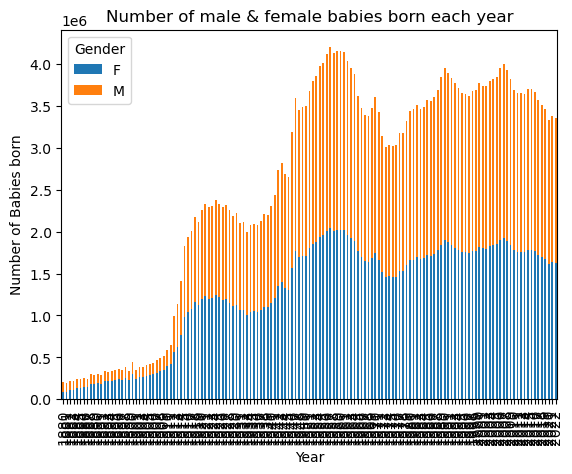

In [66]:
yearly_gender_count = full_data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
yearly_gender_count.plot(kind = 'bar', stacked = True)
plt.xlabel('Year')
plt.ylabel('Number of Babies born')
plt.title('Number of male & female babies born each year')
plt.legend(title ='Gender', loc='upper left')
plt.show()

In [67]:
name_counts = full_data.groupby('Name')['Count'].sum()
top_100_names = name_counts.sort_values(ascending = False).head(100)
print(top_100_names)

Name
James      5238523
John       5180158
Robert     4858239
Michael    4423430
William    4183494
            ...   
Brenda      610047
Aaron       605834
Frances     598130
Pamela      596176
Willie      595921
Name: Count, Length: 100, dtype: int64


In [68]:
import pandas as pd

# Assuming you have already loaded and processed your data into the 'full_data' DataFrame

# Calculate the total number of male babies
total_male_babies = full_data[full_data['Gender'] == 'M']['Count'].sum()

# Calculate the total number of female babies
total_female_babies = full_data[full_data['Gender'] == 'F']['Count'].sum()

# Calculate the ratio of male to female babies
ratio_male_to_female = total_male_babies / total_female_babies

print(f"Ratio of Male to Female Babies Born: {ratio_male_to_female:.2f}")


Ratio of Male to Female Babies Born: 1.02


In [69]:
import pandas as pd

# Assuming you have already loaded and processed your data into the 'full_data' DataFrame

# Calculate the total number of male babies
total_male_babies = full_data[full_data['Gender'] == 'M']['Count'].sum()

print(f"Total Number of Male Babies Born: {total_male_babies}")


Total Number of Male Babies Born: 184615480


In [70]:
import pandas as pd

# Assuming you have already loaded and processed your data into the 'full_data' DataFrame

# Calculate the total number of male babies
total_male_babies = full_data[full_data['Gender'] == 'F']['Count'].sum()

print(f"Total Number of Female Babies Born: {total_male_babies}")


Total Number of Female Babies Born: 180680711


In [71]:
difference = total_male_babies - total_female_babies

print(f"Difference Between Male and Female Babies Born: {difference}")

Difference Between Male and Female Babies Born: 0


In [72]:
ratio_male_to_female = total_male_babies / total_female_babies

print(f"Ratio of Male to Female Babies Born: {ratio_male_to_female:.2f}")

Ratio of Male to Female Babies Born: 1.00
